In [34]:
#Importing all required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, matthews_corrcoef, f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [35]:
#importing the data
df = pd.read_csv("/content/heart disease.csv")

In [36]:
# Making a copy of data, one which hasn't been scaled or encoded
df_pre = df.copy()

In [37]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [38]:
# Function to convert age range to mean or handle '80 or older'
def convert_age_category(value):
    if value == '80 or older':
        return 80
    low, high = value.split('-')
    return (int(low) + int(high)) / 2

# Apply this function to the 'age category' column
df['AgeCategory'] = df['AgeCategory'].apply(convert_age_category)

In [39]:
df#['AgeCategory'].value_counts()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80.0,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67.0,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,77.0,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42.0,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,62.0,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,37.0,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,47.0,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,27.0,Hispanic,No,No,Good,12.0,No,No,No


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  float64
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [41]:
#Check for the amount of columns which are empty
df.isna().sum().sum()

0

In [42]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [43]:
# Identify categorical columns with more than two categories, binary categories, and numerical columns
categorical_columns = ['AgeCategory', 'Race', 'GenHealth']
binary_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic',
                  'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
numerical_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Applying Label Encoding for binary columns
for col in binary_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encoding for categorical columns with more than two categories
df = pd.get_dummies(df, columns=categorical_columns)

# Feature scaling for numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,No,-1.844750,1,0,0,-0.046751,3.281069,0,0,2,...,0,0,0,0,1,0,0,0,0,1
1,No,-1.256338,0,0,1,-0.424070,-0.490039,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,No,-0.274603,1,0,0,2.091388,3.281069,0,1,2,...,0,0,0,0,1,0,1,0,0,0
3,No,-0.647473,0,0,0,-0.424070,-0.490039,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,No,-0.726138,0,0,0,3.097572,-0.490039,1,0,0,...,0,0,0,0,1,0,0,0,0,1


<ipython-input-44-731a3e46eeef>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='coolwarm', ax=ax[0])
<ipython-input-44-731a3e46eeef>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking', data=df, palette='viridis', ax=ax[1])
<ipython-input-44-731a3e46eeef>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['No', 'Yes']) #Setting custom labels as I have encoded already
<ipython-input-44-731a3e46eeef>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns

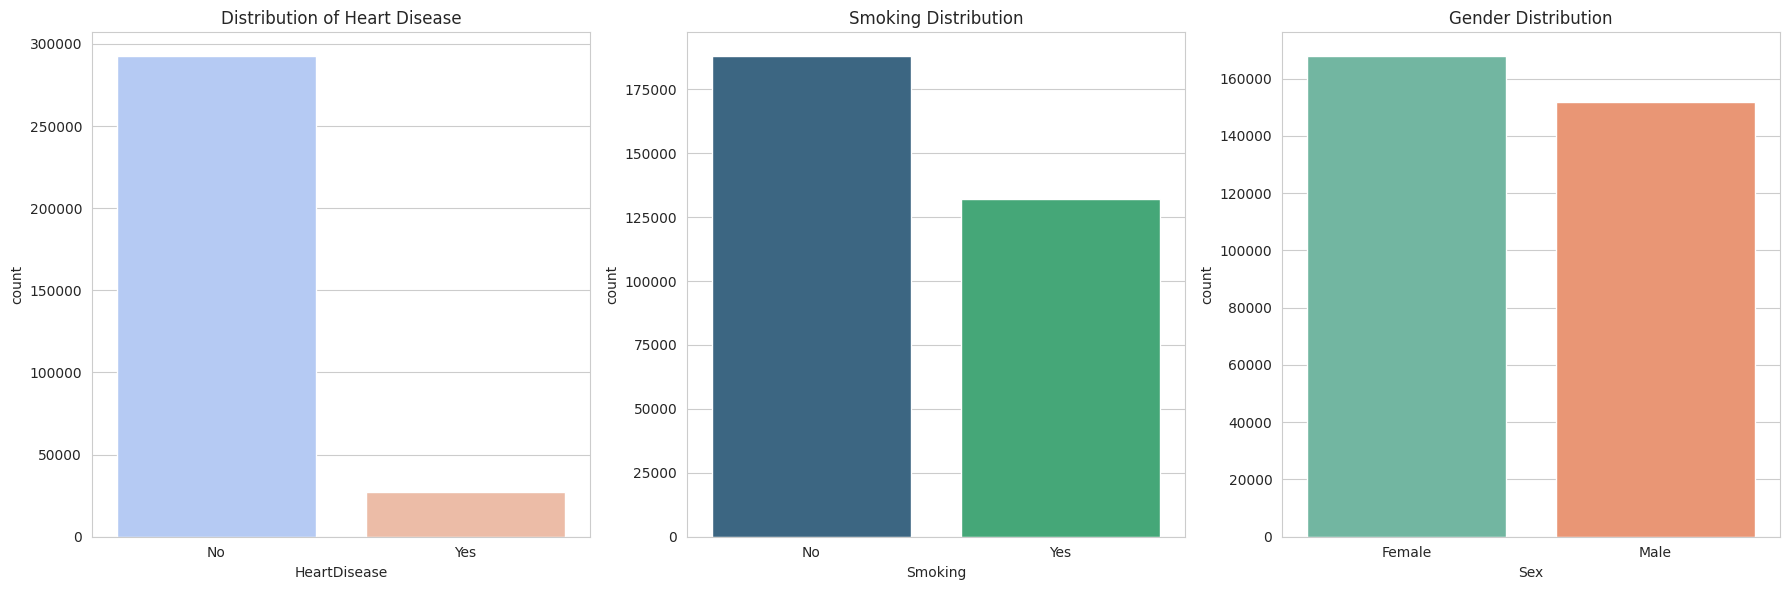

In [44]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure to hold the subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the distribution of 'HeartDisease'
sns.countplot(x='HeartDisease', data=df, palette='coolwarm', ax=ax[0])
ax[0].set_title('Distribution of Heart Disease')

# Plotting the distribution of 'Smoking'
sns.countplot(x='Smoking', data=df, palette='viridis', ax=ax[1])
ax[1].set_title('Smoking Distribution')
ax[1].set_xticklabels(['No', 'Yes']) #Setting custom labels as I have encoded already

# Plotting the distribution of 'Sex'
sns.countplot(x='Sex', data=df, palette='Set2', ax=ax[2])
ax[2].set_title('Gender Distribution')
ax[2].set_xticklabels(['Female', 'Male'])

# Display the plots
plt.tight_layout()
plt.show()

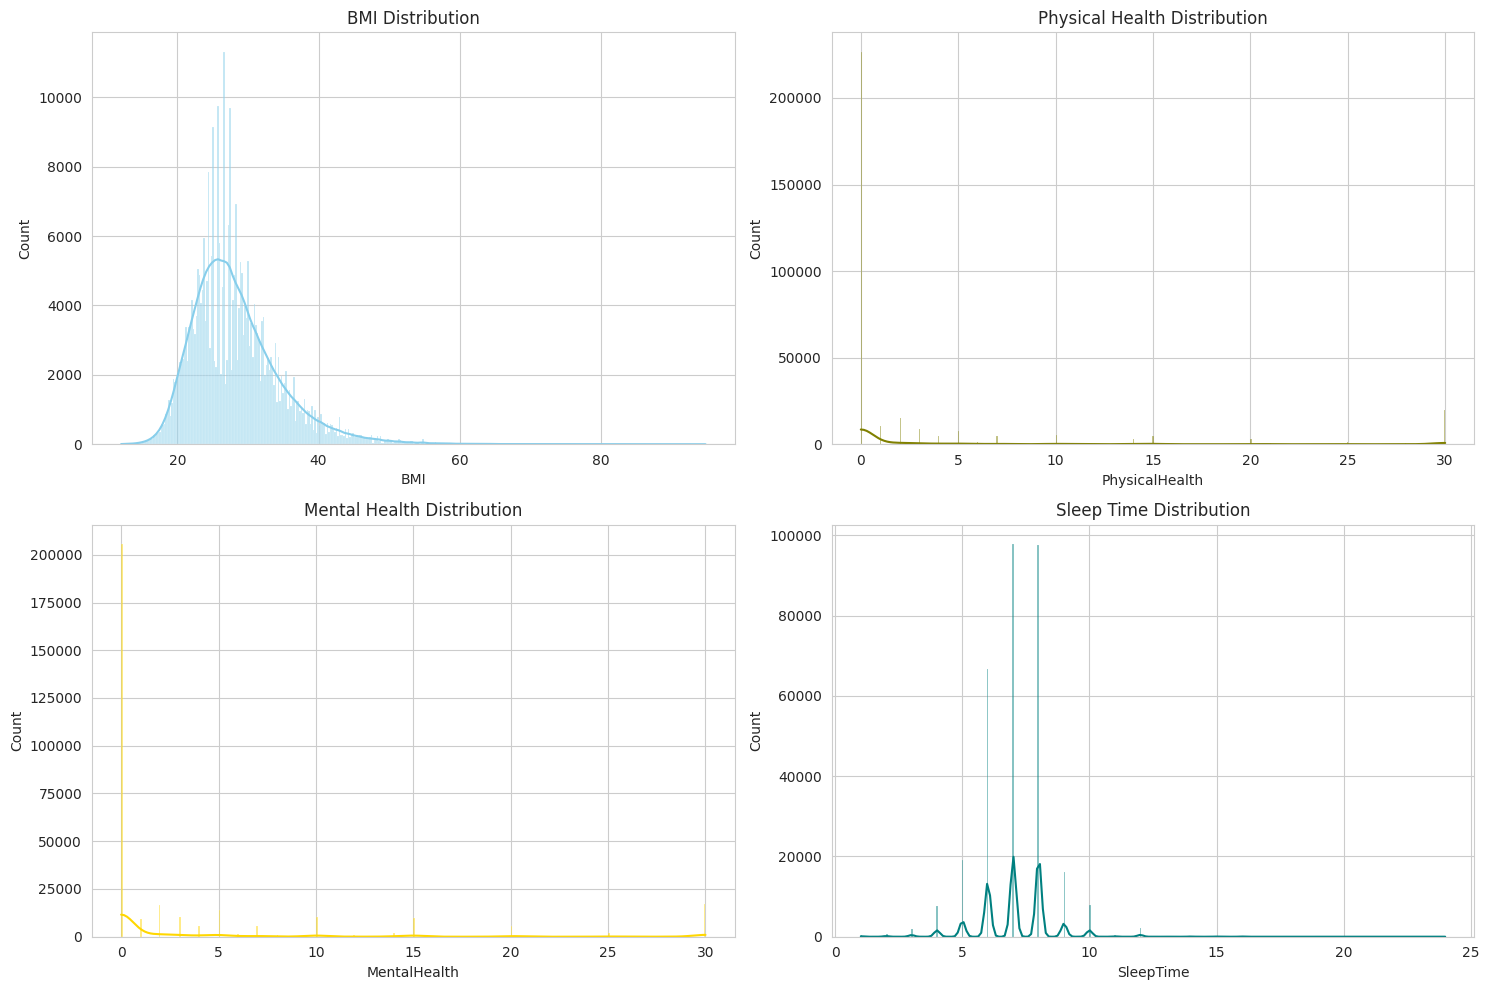

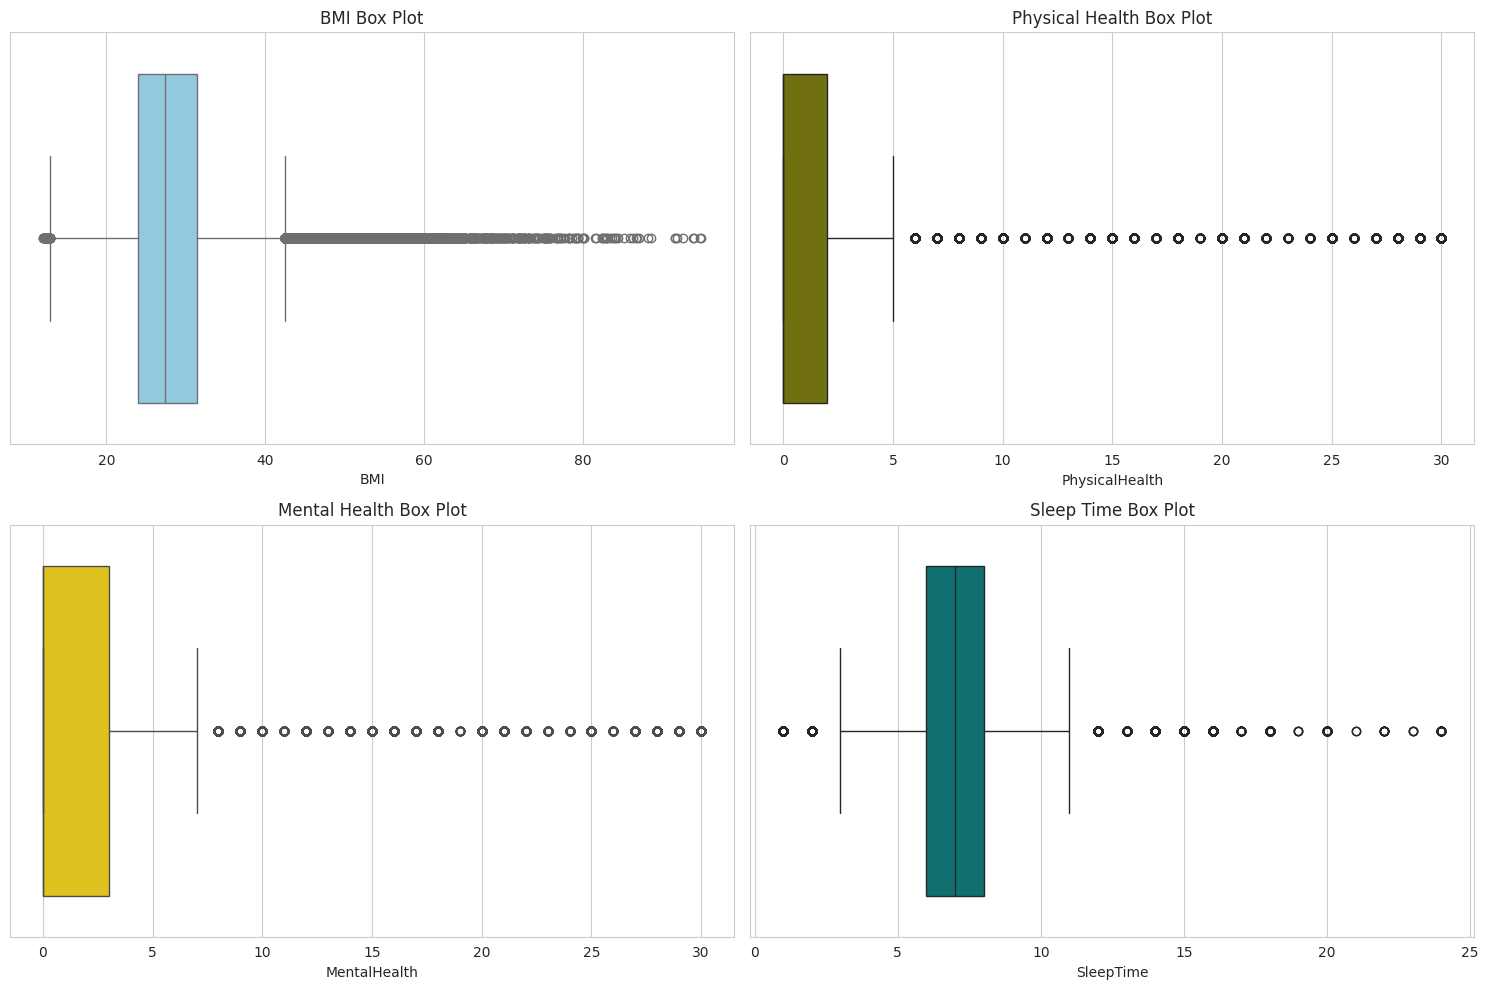

In [45]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating histograms for numerical variables
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df_pre['BMI'], kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].set_title('BMI Distribution')

sns.histplot(df_pre['PhysicalHealth'], kde=True, color="olive", ax=axs[0, 1])
axs[0, 1].set_title('Physical Health Distribution')

sns.histplot(df_pre['MentalHealth'], kde=True, color="gold", ax=axs[1, 0])
axs[1, 0].set_title('Mental Health Distribution')

sns.histplot(df_pre['SleepTime'], kde=True, color="teal", ax=axs[1, 1])
axs[1, 1].set_title('Sleep Time Distribution')

plt.tight_layout()

# Creating box plots for the same numerical variables
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x=df_pre['BMI'], color="skyblue", ax=axs[0, 0])
axs[0, 0].set_title('BMI Box Plot')

sns.boxplot(x=df_pre['PhysicalHealth'], color="olive", ax=axs[0, 1])
axs[0, 1].set_title('Physical Health Box Plot')

sns.boxplot(x=df_pre['MentalHealth'], color="gold", ax=axs[1, 0])
axs[1, 0].set_title('Mental Health Box Plot')

sns.boxplot(x=df_pre['SleepTime'], color="teal", ax=axs[1, 1])
axs[1, 1].set_title('Sleep Time Box Plot')

plt.tight_layout()
plt.show()

<ipython-input-46-3aa8fa8d7f62>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_subset = df[selected_columns].corr()


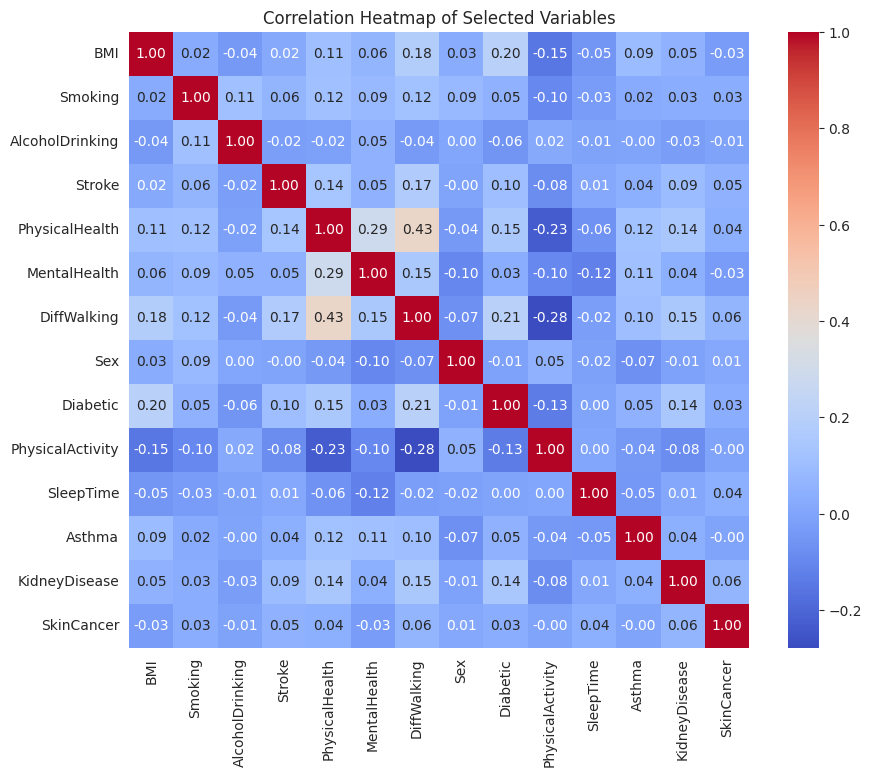

In [46]:
# Selecting a subset of variables for the heatmap
selected_columns = ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']


# Calculating the correlation matrix for the selected variables
correlation_matrix_subset = df[selected_columns].corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

In [47]:
# Selecting numerical variables for PCA
numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime' ]
X = df[numerical_features]


In [ ]:
X

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.844750,-0.046751,3.281069,-1.460354
1,-1.256338,-0.424070,-0.490039,-0.067601
2,-0.274603,2.091388,3.281069,0.628776
3,-0.647473,-0.424070,-0.490039,-0.763977
4,-0.726138,3.097572,-0.490039,0.628776
...,...,...,...,...
319790,-0.144019,0.456341,-0.490039,-0.763977
319791,0.238291,-0.424070,-0.490039,-1.460354
319792,-0.642753,-0.424070,-0.490039,-0.763977
319793,0.705560,-0.424070,-0.490039,3.414282


In [48]:
# Initialize PCA and reduce to two principal components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame for the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Adding back the 'HeartDisease' column for colouring in the plot
df_pca['HeartDisease'] = df['HeartDisease']

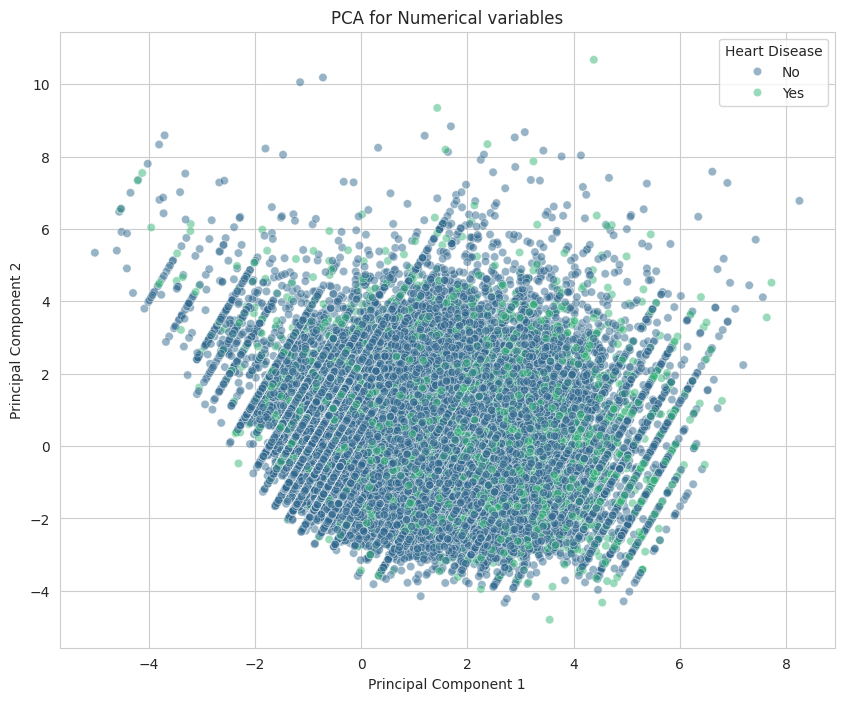

In [49]:
# Plotting the PCA result, coloring by 'HeartDisease'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='HeartDisease', data=df_pca, alpha=0.5, palette='viridis')
plt.title('PCA for Numerical variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease')
plt.show()

In [50]:
print(pca.explained_variance_ratio_)

[0.34578571 0.23979897]


In [51]:
y=df['HeartDisease']
df.drop('HeartDisease',axis=1,inplace=True)

In [52]:
df #Sanity check

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,-1.844750,1,0,0,-0.046751,3.281069,0,0,2,1,...,0,0,0,0,1,0,0,0,0,1
1,-1.256338,0,0,1,-0.424070,-0.490039,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,-0.274603,1,0,0,2.091388,3.281069,0,1,2,1,...,0,0,0,0,1,0,1,0,0,0
3,-0.647473,0,0,0,-0.424070,-0.490039,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,-0.726138,0,0,0,3.097572,-0.490039,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.144019,1,0,0,0.456341,-0.490039,1,1,2,0,...,0,0,1,0,0,0,1,0,0,0
319791,0.238291,1,0,0,-0.424070,-0.490039,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
319792,-0.642753,0,0,0,-0.424070,-0.490039,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
319793,0.705560,0,0,0,-0.424070,-0.490039,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [53]:
X_train, X_test, y_train, y_test=train_test_split(df,y,test_size=0.1,random_state=42)

In [54]:
print(np.unique(y_test))  # Sanity check
print(np.unique(y_train))

['No' 'Yes']
['No' 'Yes']


In [55]:
models = [KNeighborsClassifier(), RandomForestClassifier(random_state=42), LogisticRegression(), ]
scores = dict()


for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test, y_pred)}')
    print(f'Precision_score: {precision_score(y_test, y_pred, pos_label="Yes")}')  # Assuming Yes is the positive class
    print(f'Recall_score: {recall_score(y_test, y_pred, pos_label="Yes")}')
    print(f'F1-score: {f1_score(y_test, y_pred, pos_label="Yes")}')
    print(f'Matthews Correlation Coefficient: {matthews_corrcoef(y_test, y_pred)}')
    print('-'*20, '\n')

model: KNeighborsClassifier()
Accuracy_score: 0.9028767979987492
Precision_score: 0.3700873362445415
Recall_score: 0.11820083682008369
F1-score: 0.1791754756871036
Matthews Correlation Coefficient: 0.16852318452159626
-------------------- 

model: RandomForestClassifier(random_state=42)
Accuracy_score: 0.9018449030644152
Precision_score: 0.36131013306038895
Recall_score: 0.12308228730822873
F1-score: 0.1836150845253576
Matthews Correlation Coefficient: 0.1687619569826795
-------------------- 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model: LogisticRegression()
Accuracy_score: 0.9124765478424015
Precision_score: 0.5652173913043478
Recall_score: 0.10425383542538354
F1-score: 0.17603768030615247
Matthews Correlation Coefficient: 0.21584757946958547
-------------------- 



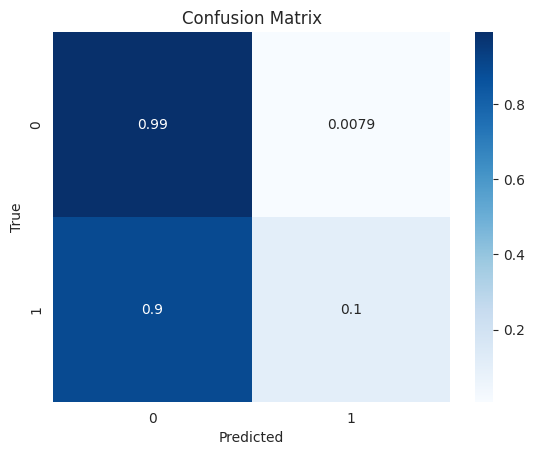

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [57]:
# Redefining custom scorers for precision, recall, and f1 to handle 'Yes' as the positive label
scorers = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label='Yes'),
    'recall': make_scorer(recall_score, pos_label='Yes'),
    'f1': make_scorer(f1_score, pos_label='Yes'),
    'matthews_corrcoef': make_scorer(matthews_corrcoef)
}

for model in models:
    # Apply cross-validation, calculating all the specified metrics
    cv_results = cross_validate(model, X, y, cv=5, scoring=scorers)

    print(f"Model: {model.__class__.__name__}")
    for metric in scorers.keys():
        average_score = np.mean(cv_results[f'test_{metric}'])
        print(f"{metric.capitalize()} score: {average_score:.4f}")
    print('-' * 40)

Model: KNeighborsClassifier
Accuracy score: 0.9067
Precision score: 0.1906
Recall score: 0.0277
F1 score: 0.0483
Matthews_corrcoef score: 0.0421
----------------------------------------
Model: RandomForestClassifier
Accuracy score: 0.8959
Precision score: 0.1675
Recall score: 0.0544
F1 score: 0.0821
Matthews_corrcoef score: 0.0495
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: LogisticRegression
Accuracy score: 0.9144
Precision score: 0.2000
Recall score: 0.0000
F1 score: 0.0001
Matthews_corrcoef score: 0.0023
----------------------------------------
